In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("online_retail_II.xlsx")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
#check invoice number values
df['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array([nan, 'C', 'A'], dtype=object)

In [7]:
df[df['Invoice'].str.startswith('C') == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


# Data Cleaning

In [8]:
cleaned_df = df[~(df['Invoice'].str.startswith('A') == True) & ~(df['Invoice'].str.startswith('C')== True)]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [9]:
cleaned_df["Invoice"].astype("str").str.replace("[0-9]", "", regex=True).unique()

array([''], dtype=object)

In [10]:
#now clean the stockcode column
df['StockCode'].str.replace("[0-9]", "", regex=True).unique()

array([nan, 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS', 'DOT', 'U', 'b',
       'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V', 'T', 'I',
       'BANK CHARGES', 'O', 'Z', 'TEST', 'gift__', 'DCGSN', 'm', 'PADS',
       'Y', 'HC', 'e', 'd', 'ADJUST', 'DCGSSGIRL', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGSSBOY', 'DCGSLGIRL', 'j', 'l', 'n', 'J ', 'SP',
       'AMAZONFEE'], dtype=object)

In [11]:
cleaned_df[cleaned_df["StockCode"].str.endswith("P") == True][cleaned_df["Quantity"] < 0]

C:\Users\ALKAMEL TEC\AppData\Local\Temp\ipykernel_8940\4103673042.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df[cleaned_df["StockCode"].str.endswith("P") == True][cleaned_df["Quantity"] < 0]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
71694,495894,35822P,NaN,-3,2010-01-27 12:23:00,0.0,NaN,United Kingdom
118223,500676,16161P,NaN,-250,2010-03-09 12:28:00,0.0,NaN,United Kingdom
145781,503239,46000P,NaN,-10,2010-03-30 17:52:00,0.0,NaN,United Kingdom
172989,505752,35824P,damages,-26,2010-04-26 09:41:00,0.0,NaN,United Kingdom
173045,505764,79323LP,NaN,-8,2010-04-26 10:25:00,0.0,NaN,United Kingdom
173047,505765,79323P,NaN,-218,2010-04-26 10:26:00,0.0,NaN,United Kingdom
274041,516014,37479P,damages,-450,2010-07-16 09:57:00,0.0,NaN,United Kingdom
331488,521772,16169P,NaN,-11,2010-09-08 12:36:00,0.0,NaN,United Kingdom
428340,530327,35004P,NaN,-9,2010-11-02 13:41:00,0.0,NaN,United Kingdom


In [12]:
cleaned_df[cleaned_df["StockCode"].str.contains("W") == True].isna().sum()

Invoice          0
StockCode        0
Description      7
Quantity         0
InvoiceDate      0
Price            0
Customer ID    228
Country          0
dtype: int64

In [13]:
cleaned_df[cleaned_df["StockCode"].str.contains("C") == True].isna().sum()

Invoice           0
StockCode         0
Description     204
Quantity          0
InvoiceDate       0
Price             0
Customer ID    2756
Country           0
dtype: int64

In [14]:
cleaned_df[cleaned_df["StockCode"].str.contains("C") == True][cleaned_df["Quantity"] < 0]

C:\Users\ALKAMEL TEC\AppData\Local\Temp\ipykernel_8940\1750579682.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df[cleaned_df["StockCode"].str.contains("C") == True][cleaned_df["Quantity"] < 0]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
23988,491355,17014C,NaN,-96,2009-12-10 15:52:00,0.0,NaN,United Kingdom
32106,491975,72752C,NaN,-24,2009-12-14 18:44:00,0.0,NaN,United Kingdom
32108,491978,72755C,NaN,-60,2009-12-14 18:45:00,0.0,NaN,United Kingdom
35497,492365,17011C,NaN,-47,2009-12-16 13:56:00,0.0,NaN,United Kingdom
39399,492719,48173C,MIA,-9,2009-12-18 10:49:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
436915,531155,35981C,NaN,-8,2010-11-05 14:19:00,0.0,NaN,United Kingdom
436921,531161,85121C,NaN,-15,2010-11-05 14:21:00,0.0,NaN,United Kingdom
489715,535280,16169C,damages,-200,2010-11-25 14:16:00,0.0,NaN,United Kingdom
507273,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom


In [15]:
cleaned_df[cleaned_df["StockCode"].str.contains("PAD") == True].isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [16]:
cleaned_df[cleaned_df["StockCode"].str.contains("B") == True].isna().sum() #DROP IT

Invoice           0
StockCode         0
Description     294
Quantity          0
InvoiceDate       0
Price             0
Customer ID    5633
Country           0
dtype: int64

In [17]:
cleaned_df[cleaned_df["StockCode"].str.contains("F") == True][cleaned_df["Quantity"] < 0] #DROP IT

C:\Users\ALKAMEL TEC\AppData\Local\Temp\ipykernel_8940\3130495095.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df[cleaned_df["StockCode"].str.contains("F") == True][cleaned_df["Quantity"] < 0] #DROP IT


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
66471,495324,44266F,NaN,-2,2010-01-22 15:54:00,0.0,NaN,United Kingdom
82471,496967,72801F,NaN,-7,2010-02-04 19:45:00,0.0,NaN,United Kingdom
83304,497107,GIFT,NaN,-9,2010-02-05 15:18:00,0.0,NaN,United Kingdom
83372,497141,84248F,NaN,-12,2010-02-05 15:45:00,0.0,NaN,United Kingdom
83553,497170,85185F,NaN,-6,2010-02-05 17:24:00,0.0,NaN,United Kingdom
100245,498857,17091F,NaN,-25,2010-02-23 12:20:00,0.0,NaN,United Kingdom
102237,499131,17084F,NaN,-50,2010-02-24 16:28:00,0.0,NaN,United Kingdom
102239,499132,17014F,NaN,-29,2010-02-24 16:29:00,0.0,NaN,United Kingdom
103972,499311,17129F,NaN,-120,2010-02-26 10:25:00,0.0,NaN,United Kingdom
118981,500738,47504F,NaN,-2916,2010-03-09 16:33:00,0.0,NaN,United Kingdom


In [18]:
#Drop Every Thing Except for PAD as it look legitimate
drops = ['p','W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS', 'DOT', 'U', 'b',
       'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V', 'T', 'I',
       'BANK CHARGES', 'O', 'Z', 'TEST', 'gift__', 'DCGSN', 'm',
       'Y', 'HC', 'e', 'd', 'ADJUST', 'DCGSSGIRL', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGSSBOY', 'DCGSLGIRL', 'j', 'l', 'n', 'J ', 'SP',
       'AMAZONFEE']

In [19]:
cleaned_df[cleaned_df["StockCode"].str.contains("p") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2815,489615,37482p,CUBIC MUG PINK POLKA DOT,1,2009-12-01 14:56:00,17.35,NaN,United Kingdom
44517,493283,37482p,CUBIC MUG PINK POLKA DOT,1,2009-12-22 15:12:00,17.35,NaN,United Kingdom
248198,513381,15056p,EDWARDIAN PARASOL PINK,1,2010-06-24 11:38:00,12.72,NaN,United Kingdom
248448,513403,15056p,EDWARDIAN PARASOL PINK,1,2010-06-24 11:51:00,12.72,NaN,United Kingdom
263991,514918,15056p,EDWARDIAN PARASOL PINK,1,2010-07-07 11:18:00,12.72,NaN,United Kingdom
280146,516700,15056p,EDWARDIAN PARASOL PINK,1,2010-07-22 12:09:00,12.72,NaN,United Kingdom
290099,517633,15056p,EDWARDIAN PARASOL PINK,1,2010-07-30 12:44:00,12.72,NaN,United Kingdom
318583,520411,15056p,EDWARDIAN PARASOL PINK,1,2010-08-26 09:36:00,12.72,NaN,United Kingdom
318605,520414,15056p,EDWARDIAN PARASOL PINK,1,2010-08-26 09:41:00,12.72,NaN,United Kingdom
324438,520998,15056p,EDWARDIAN PARASOL PINK,1,2010-09-01 13:39:00,12.72,NaN,United Kingdom


In [20]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

C:\Users\ALKAMEL TEC\AppData\Local\Temp\ipykernel_8940\4042005776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")


In [21]:
cleaned_df = cleaned_df[ (cleaned_df["StockCode"].str.match("^\\d{5}$")) | (cleaned_df["StockCode"].str == "PADS")]

In [22]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [23]:
cleaned_df = cleaned_df[ cleaned_df["Customer ID"].isna() == False ]

In [24]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [25]:
cleaned_df[cleaned_df["Quantity"] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [26]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350929.000000,350929,350929.000000,350929.000000
mean,13.700113,2010-07-05 17:14:04.387041024,2.979683,15360.276233
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-31 17:29:00,1.250000,13985.000000
50%,5.000000,2010-07-18 13:42:00,1.950000,15311.000000
75%,12.000000,2010-10-17 14:26:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,100.076779,NaN,4.424721,1678.208380


In [27]:
cleaned_df = cleaned_df[ cleaned_df["Price"]  > 0]

In [28]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350902.000000,350902,350902.000000,350902.000000
mean,13.700566,2010-07-05 17:18:45.468763136,2.979913,15360.384495
min,1.000000,2009-12-01 07:45:00,0.030000,12346.000000
25%,2.000000,2010-03-31 17:29:00,1.250000,13985.000000
50%,5.000000,2010-07-18 13:42:00,1.950000,15311.000000
75%,12.000000,2010-10-17 14:26:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,100.080558,NaN,4.424814,1678.168412


In [29]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [30]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350902.000000,350902,350902.000000,350902.000000
mean,13.700566,2010-07-05 17:18:45.468763136,2.979913,15360.384495
min,1.000000,2009-12-01 07:45:00,0.030000,12346.000000
25%,2.000000,2010-03-31 17:29:00,1.250000,13985.000000
50%,5.000000,2010-07-18 13:42:00,1.950000,15311.000000
75%,12.000000,2010-10-17 14:26:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,100.080558,NaN,4.424814,1678.168412


In [31]:
cleaned_df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [32]:
cleaned_df[cleaned_df['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


# Feature Engineering
### Create new Features for better analysis ==> Recency, Frequency , MoneyAmount

In [33]:
engineered_df = cleaned_df.copy()
engineered_df['WholeQuantityPrice'] = engineered_df['Quantity'] * engineered_df['Price']

In [34]:
#engineered_df['Recency'] = most_recent_date - engineered_df['InvoiceDate']

In [35]:
#engineered_df['Recency']

In [36]:
#engineered_df['WholeQuantityPrice'] = engineered_df['Quantity'] * engineered_df['Price']

In [37]:
#grouped= engineered_df.groupby('Customer ID')
#money = grouped['WholeQuantityPrice'].agg('sum') #for each user, what is the total amount he has paid to the store
#money

In [38]:
grouped_df = engineered_df.groupby('Customer ID', as_index=False).agg(
    MonetaryValue=('WholeQuantityPrice', 'sum'),
    Frequency=('Invoice', 'nunique'),
    LastInvoiceDate=('InvoiceDate', 'max')
)

In [39]:
grouped_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,144.02,2,2010-06-28 13:53:00
1,12347.0,966.87,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,1946.64,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4243,18283.0,563.19,6,2010-11-22 15:30:00
4244,18284.0,391.28,1,2010-10-04 11:33:00
4245,18285.0,361.10,1,2010-02-17 10:24:00
4246,18286.0,948.30,2,2010-08-20 11:57:00


In [40]:
most_recent_date= grouped_df['LastInvoiceDate'].max()

In [41]:
most_recent_date

Timestamp('2010-12-09 20:01:00')

In [42]:
grouped_df['Recency'] = (most_recent_date - grouped_df['LastInvoiceDate']).dt.days

In [43]:
grouped_df['Recency']

0       164
1         2
2        73
3        42
4        10
       ... 
4243     17
4244     66
4245    295
4246    111
4247     17
Name: Recency, Length: 4248, dtype: int64

## Dealing with Outliers

Text(0, 0.5, 'Count')

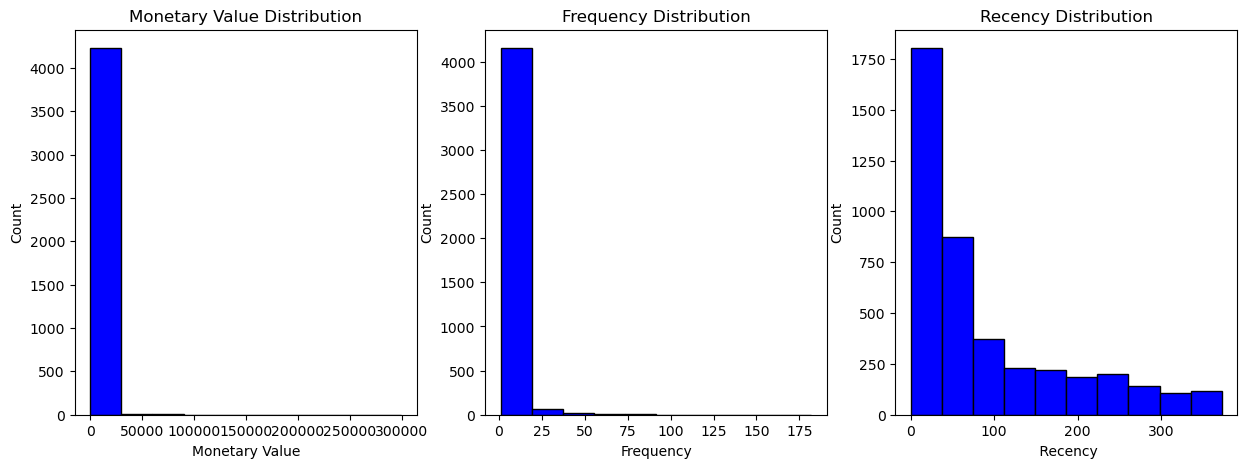

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(grouped_df['MonetaryValue'], bins=10, color='blue', edgecolor='black')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(grouped_df['Frequency'], bins=10, color='blue', edgecolor='black')
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(grouped_df['Recency'], bins=10, color='blue', edgecolor='black')
plt.title("Recency Distribution")
plt.xlabel(" Recency")
plt.ylabel("Count")

In [45]:
import seaborn as sns

Text(0, 0.5, 'Count')

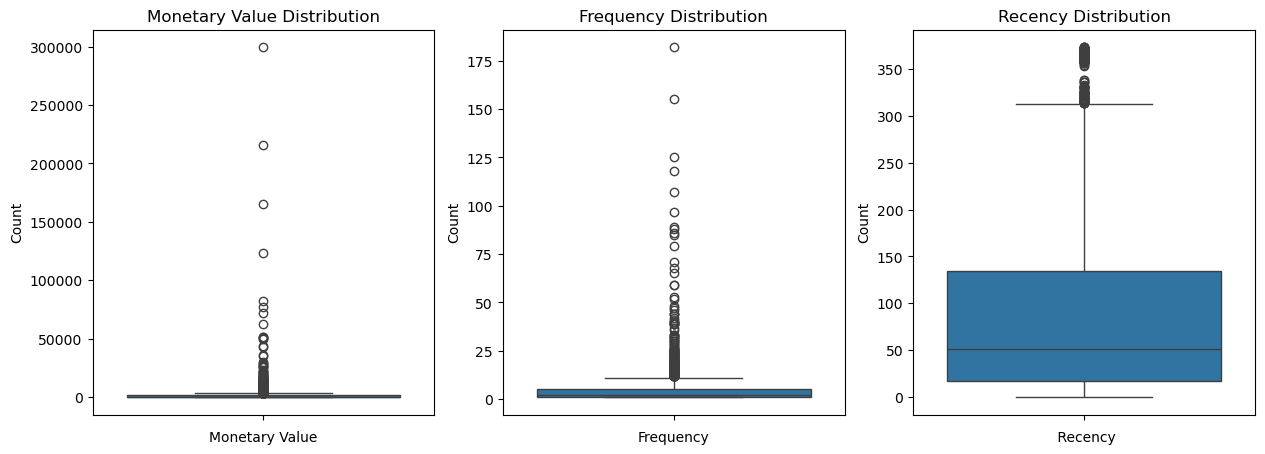

In [46]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(grouped_df['MonetaryValue'])
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(grouped_df['Frequency'])
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(grouped_df['Recency'])
plt.title("Recency Distribution")
plt.xlabel(" Recency")
plt.ylabel("Count")

In [47]:
M_Q1 = grouped_df['MonetaryValue'].quantile(0.25)
M_Q3 = grouped_df['MonetaryValue'].quantile(0.75)

M_IQR = M_Q3 - M_Q1
M_IQR

1214.4850000000001

In [48]:
monetary_outliers_df = grouped_df[ (grouped_df["MonetaryValue"] > (M_Q3 + 1.5*M_IQR) )  | (grouped_df["MonetaryValue"] < (M_Q1 - 1.5*M_IQR) ) ]
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,412.000000,412.000000,412.000000,412,412.000000
mean,15083.296117,10433.185922,17.033981,2010-11-10 21:01:28.106796032,28.674757
min,12357.000000,3308.900000,1.000000,2009-12-10 18:03:00,0.000000
25%,13561.750000,3957.300000,8.000000,2010-11-08 13:45:45,3.000000
50%,14956.500000,5389.850000,12.000000,2010-11-26 15:03:30,13.000000
75%,16653.000000,8847.182500,18.000000,2010-12-06 12:47:30,31.000000
max,18260.000000,299485.800000,182.000000,2010-12-09 19:32:00,364.000000
std,1733.822102,22291.545822,19.376882,NaN,49.154417


In [49]:
F_Q1 = grouped_df['Frequency'].quantile(0.25)
F_Q3 = grouped_df['Frequency'].quantile(0.75)

F_IQR = F_Q3 - F_Q1
F_IQR

4.0

In [50]:
frequency_outliers_df = grouped_df[ (grouped_df["Frequency"] > (F_Q3 + 1.5*F_IQR) )  | (grouped_df["Frequency"] < (F_Q1 - 1.5*F_IQR) ) ]
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,269.000000,269.000000,269.000000,269,269.000000
mean,15392.802974,12298.980706,23.698885,2010-11-23 16:23:39.033456896,15.866171
min,12437.000000,898.140000,12.000000,2010-05-12 16:51:00,0.000000
25%,13831.000000,3638.010000,13.000000,2010-11-21 10:38:00,2.000000
50%,15527.000000,5572.670000,17.000000,2010-12-02 12:09:00,7.000000
75%,16883.000000,10269.460000,24.000000,2010-12-07 12:43:00,18.000000
max,18260.000000,299485.800000,182.000000,2010-12-09 19:32:00,211.000000
std,1748.380712,27198.754280,21.578787,NaN,26.789616


In [51]:
R_Q1 = grouped_df['Recency'].quantile(0.25)
R_Q3 = grouped_df['Recency'].quantile(0.75)

R_IQR = R_Q3 - R_Q1
R_IQR

118.0

In [52]:
recency_outliers_df = grouped_df[ (grouped_df["Recency"] > (R_Q3 + 1.5*R_IQR) )  | (grouped_df["Recency"] < (R_Q1 - 1.5*R_IQR) ) ]
recency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,167.000000,167.000000,167.000000,167,167.000000
mean,15401.508982,307.531198,1.245509,2009-12-24 02:49:12.934131968,350.431138
min,12439.000000,2.950000,1.000000,2009-12-01 12:55:00,314.000000
25%,14115.500000,101.400000,1.000000,2009-12-07 13:28:00,327.000000
50%,15380.000000,183.080000,1.000000,2009-12-14 16:11:00,360.000000
75%,16782.500000,313.605000,1.000000,2010-01-16 13:27:30,367.000000
max,18201.000000,4825.680000,6.000000,2010-01-29 14:22:00,373.000000
std,1620.566768,529.119523,0.756236,NaN,20.647494


## Get Non-Outlier data

In [53]:
non_outlier_df = grouped_df[ ~(grouped_df.index.isin(monetary_outliers_df.index)) & ~(grouped_df.index.isin(frequency_outliers_df.index)) & ~(grouped_df.index.isin(recency_outliers_df.index))]

In [54]:
non_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3620.000000,3620.000000,3620.000000,3620,3620.000000
mean,15370.587017,796.512975,2.931492,2010-09-15 03:52:01.508287232,85.391436
min,12346.000000,3.750000,1.000000,2010-01-31 12:19:00,0.000000
25%,13896.750000,250.522500,1.000000,2010-08-02 14:12:30,21.000000
50%,15378.500000,535.505000,2.000000,2010-10-15 13:49:00,55.000000
75%,16849.500000,1138.480000,4.000000,2010-11-18 13:18:45,129.000000
max,18287.000000,3298.600000,11.000000,2010-12-09 20:01:00,312.000000
std,1694.928260,718.882253,2.250112,NaN,83.562242


Text(0, 0.5, 'Count')

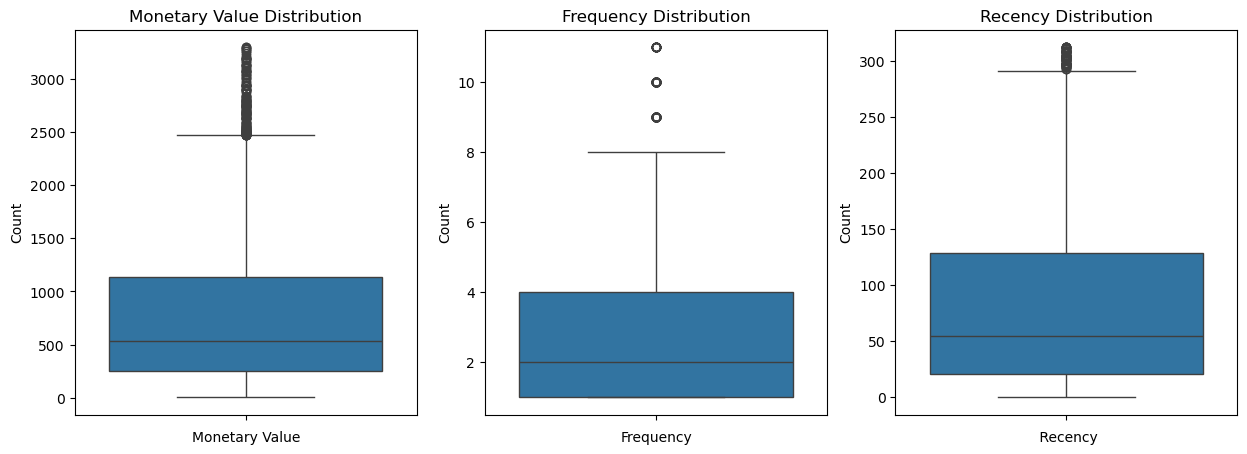

In [55]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outlier_df['MonetaryValue'])
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(non_outlier_df['Frequency'])
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(non_outlier_df['Recency'])
plt.title("Recency Distribution")
plt.xlabel(" Recency")
plt.ylabel("Count")

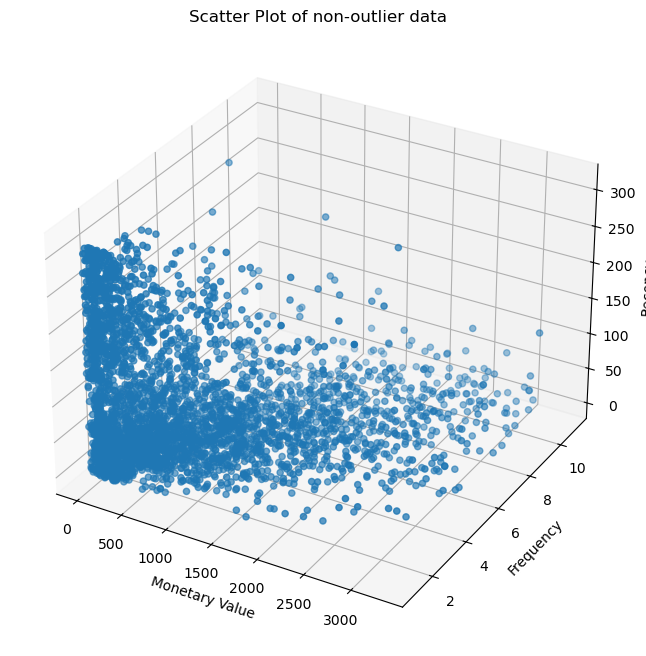

In [56]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")
ax.scatter(non_outlier_df['MonetaryValue'],non_outlier_df['Frequency'],non_outlier_df['Recency'])
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("Scatter Plot of non-outlier data")
plt.show()

## Get Insights

what is the relationship between monetary value and frequency

In [107]:
corr = non_outlier_df['MonetaryValue'].corr(non_outlier_df['Frequency']) #seems like a high correlation between both of them
corr

0.724025446402702

In [57]:
# we need to scale data in favour of the K-Means 

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
scaled_non_outlier = scaler.fit_transform(non_outlier_df[["MonetaryValue", "Frequency", "Recency"]])

In [61]:
scaled_non_outlier_df = pd.DataFrame(scaled_non_outlier, index=non_outlier_df.index, columns=["MonetaryValue", "Frequency", "Recency"])
scaled_non_outlier_df

,MonetaryValue,Frequency,Recency
0,-0.907775,-0.414033,0.940849
1,0.237008,-0.414033,-0.998094
2,-0.800454,-0.858517,-0.148310
3,1.600103,-0.414033,-0.519343
4,-0.689475,-0.858517,-0.902344
...,...,...,...
4243,-0.324608,1.363902,-0.818562
4244,-0.563777,-0.858517,-0.232092
4245,-0.605764,-0.858517,2.508759
4246,0.211172,-0.414033,0.306503


# K-Means Clustering

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

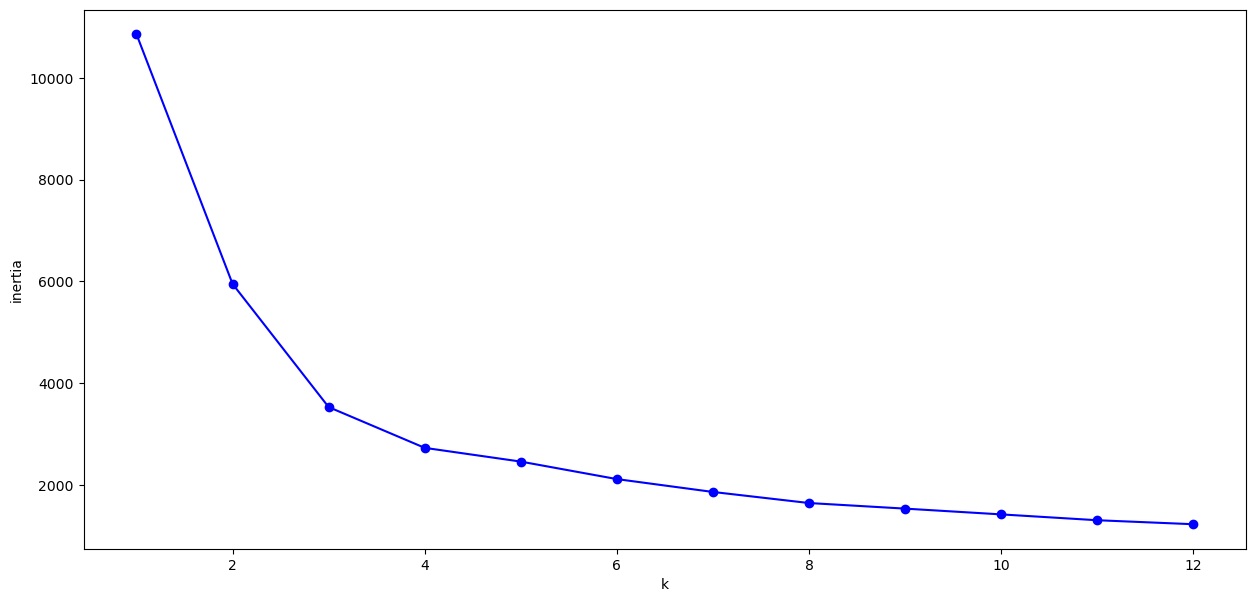

"\nplt.subplots(1,2,2)\n\nplt.plot(ks, scores, marker='o', color='blue')\nplt.xlabel('k')\nplt.ylabel('score')\nplt.show()"

In [63]:
max_k = range(1,13)
inertias = []
scores = []
ks = [i for i in max_k]
for k in max_k:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    lbls = kmeans.fit_predict(scaled_non_outlier_df)
    #print(lbls)
    #print(len(lbls))
    inertias.append(kmeans.inertia_) #looking for the elbow
    #scores.append( silhouette_score(scaled_non_outlier_df,lbls) )
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

ax.plot(ks, inertias, marker='o', color='blue')
ax.set_xlabel('k')
ax.set_ylabel('inertia')
plt.show()
'''
plt.subplots(1,2,2)

plt.plot(ks, scores, marker='o', color='blue')
plt.xlabel('k')
plt.ylabel('score')
plt.show()'''

In [64]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
lbls = kmeans.fit_predict(scaled_non_outlier_df)
scaled_non_outlier_df['Cluster'] = lbls


In [65]:
scaled_non_outlier_df['Cluster']

0       3
1       1
2       1
3       0
4       1
       ..
4243    0
4244    1
4245    3
4246    1
4247    0
Name: Cluster, Length: 3620, dtype: int32

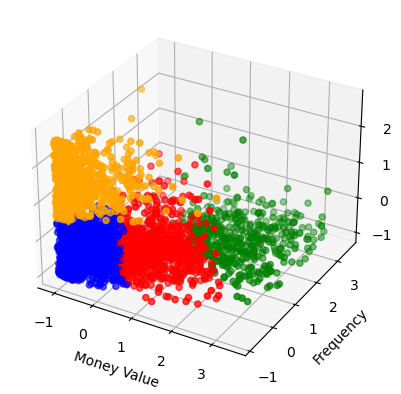

In [66]:
mmap = {
    0:'red',
    1:'blue',
    2:'green',
    3:'orange'
}
colors = scaled_non_outlier_df['Cluster'].map(mmap)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(scaled_non_outlier_df['MonetaryValue'], scaled_non_outlier_df['Frequency'], scaled_non_outlier_df['Recency'], c=colors, marker='o')
ax.set_xlabel('Money Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()

# Cluster Analysis

### Creating violin plots for Visualization

C:\Users\ALKAMEL TEC\AppData\Local\Temp\ipykernel_8940\1419492093.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=scaled_non_outlier_df['Cluster'], y=scaled_non_outlier_df['MonetaryValue'], palette=mmap)
C:\Users\ALKAMEL TEC\AppData\Local\Temp\ipykernel_8940\1419492093.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=scaled_non_outlier_df['Cluster'], y=scaled_non_outlier_df['Frequency'], palette=mmap)
C:\Users\ALKAMEL TEC\AppData\Local\Temp\ipykernel_8940\1419492093.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=

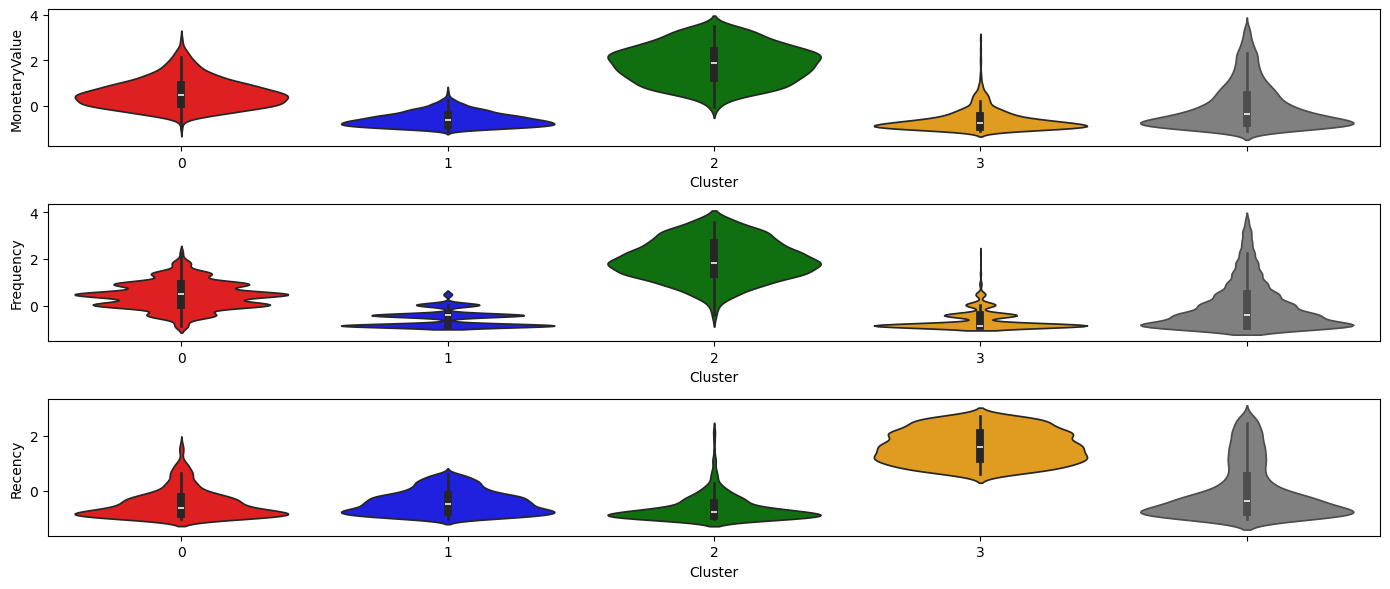

In [78]:
plt.figure(figsize=(14,6))
mmap = {
    '0':'red',
    '1':'blue',
    '2':'green',
    '3':'orange'
}
plt.subplot(3,1,1)
sns.violinplot(x=scaled_non_outlier_df['Cluster'], y=scaled_non_outlier_df['MonetaryValue'], palette=mmap)
sns.violinplot(y=scaled_non_outlier_df['MonetaryValue'], color='grey')
plt.subplot(3,1,2)
sns.violinplot(x=scaled_non_outlier_df['Cluster'], y=scaled_non_outlier_df['Frequency'], palette=mmap)
sns.violinplot(y=scaled_non_outlier_df['Frequency'], color='grey')
plt.subplot(3,1,3)
sns.violinplot(x=scaled_non_outlier_df['Cluster'], y=scaled_non_outlier_df['Recency'], palette=mmap)
sns.violinplot(y=scaled_non_outlier_df['Recency'], color='grey')
plt.tight_layout()
plt.show()

# Dealing With Outliers

In [79]:
frequency_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
64,12437.0,6429.67,20,2010-11-09 14:46:00,30
83,12471.0,17710.95,44,2010-11-30 14:35:00,9
84,12472.0,9615.37,13,2010-12-05 14:19:00,4
91,12482.0,21941.72,27,2010-05-12 16:51:00,211
113,12523.0,2184.25,12,2010-11-30 12:31:00,9
...,...,...,...,...,...
4200,18225.0,5937.33,15,2010-12-09 15:46:00,0
4201,18226.0,4776.81,15,2010-11-26 15:51:00,13
4205,18231.0,4266.26,23,2010-10-29 14:17:00,41
4214,18245.0,3293.79,13,2010-11-25 16:52:00,14


In [80]:
monetary_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.0,10468.27,1,2010-11-16 10:05:00,23
25,12380.0,4131.84,4,2010-08-31 14:54:00,100
41,12409.0,11171.42,4,2010-10-15 10:24:00,55
47,12415.0,17985.44,4,2010-11-29 15:07:00,10
59,12429.0,3515.55,5,2010-12-09 12:05:00,0
...,...,...,...,...,...
4200,18225.0,5937.33,15,2010-12-09 15:46:00,0
4201,18226.0,4776.81,15,2010-11-26 15:51:00,13
4205,18231.0,4266.26,23,2010-10-29 14:17:00,41
4217,18251.0,17853.43,7,2010-09-20 13:26:00,80


In [81]:
recency_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
65,12439.0,978.10,2,2010-01-26 12:11:00,317
68,12443.0,319.91,1,2009-12-07 15:42:00,367
82,12470.0,105.00,1,2010-01-19 11:01:00,324
96,12487.0,285.30,1,2009-12-09 11:36:00,365
119,12531.0,1538.04,1,2010-01-22 14:17:00,321
...,...,...,...,...,...
4131,18115.0,9.70,1,2010-01-11 11:57:00,332
4159,18162.0,329.46,1,2009-12-07 13:24:00,367
4173,18186.0,243.30,1,2009-12-17 10:22:00,357
4184,18199.0,167.05,1,2010-01-25 11:32:00,318


In [82]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

Index([  64,   83,   84,   91,  124,  143,  162,  177,  199,  200,
       ...
       4072, 4090, 4108, 4121, 4165, 4199, 4200, 4201, 4205, 4226],
      dtype='int64', length=218)

In [83]:
monetary_outliers_df = monetary_outliers_df.drop(overlap_indices)
frequency_outliers_df = frequency_outliers_df.drop(overlap_indices)
overlap_indices_df = grouped_df.loc[overlap_indices]
overlap_indices_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
64,12437.0,6429.67,20,2010-11-09 14:46:00,30
83,12471.0,17710.95,44,2010-11-30 14:35:00,9
84,12472.0,9615.37,13,2010-12-05 14:19:00,4
91,12482.0,21941.72,27,2010-05-12 16:51:00,211
124,12540.0,6885.18,15,2010-11-26 10:43:00,13
...,...,...,...,...,...
4199,18223.0,6633.17,12,2010-11-17 12:20:00,22
4200,18225.0,5937.33,15,2010-12-09 15:46:00,0
4201,18226.0,4776.81,15,2010-11-26 15:51:00,13
4205,18231.0,4266.26,23,2010-10-29 14:17:00,41


#### assign each df to a class manually

In [84]:
monetary_outliers_df['Cluster'] = -1
monetary_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,10468.27,1,2010-11-16 10:05:00,23,-1
25,12380.0,4131.84,4,2010-08-31 14:54:00,100,-1
41,12409.0,11171.42,4,2010-10-15 10:24:00,55,-1
47,12415.0,17985.44,4,2010-11-29 15:07:00,10,-1
59,12429.0,3515.55,5,2010-12-09 12:05:00,0,-1
...,...,...,...,...,...,...
4082,18052.0,8579.18,1,2010-05-24 11:11:00,199,-1
4085,18055.0,3308.90,6,2010-12-07 09:13:00,2,-1
4112,18092.0,6421.18,8,2010-12-09 10:00:00,0,-1
4169,18178.0,3963.04,7,2010-11-02 17:24:00,37,-1


In [85]:
frequency_outliers_df['Cluster'] = -2

In [86]:
overlap_indices_df['Cluster'] = -3

In [87]:
scaled_monetary_outlier = scaler.fit_transform(monetary_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_monetary_outlier_df = pd.DataFrame(scaled_monetary_outlier, index=monetary_outliers_df.index, columns=["MonetaryValue", "Frequency", "Recency"])
scaled_monetary_outlier_df

,MonetaryValue,Frequency,Recency
9,1.035651,-2.268066,-0.342427
25,-0.342651,-1.177145,0.887181
41,1.188600,-1.177145,0.168579
47,2.670787,-1.177145,-0.550023
59,-0.476706,-0.813505,-0.709712
...,...,...,...
4082,0.624736,-2.268066,2.468106
4085,-0.521657,-0.449864,-0.677774
4112,0.155327,0.277416,-0.709712
4169,-0.379368,-0.086224,-0.118862


In [88]:
scaled_monetary_outlier_df['Cluster'] = monetary_outliers_df['Cluster']

In [89]:
scaled_frequency_outlier = scaler.fit_transform(frequency_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_frequency_outlier_df = pd.DataFrame(scaled_frequency_outlier, index=frequency_outliers_df.index, columns=["MonetaryValue", "Frequency", "Recency"])
scaled_frequency_outlier_df['Cluster'] = frequency_outliers_df['Cluster']

In [92]:
scaled_overlap_outlier = scaler.fit_transform(overlap_indices_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_overlap_outlier_df = pd.DataFrame(scaled_overlap_outlier, index=overlap_indices_df.index, columns=["MonetaryValue", "Frequency", "Recency"])
scaled_overlap_outlier_df['Cluster'] = overlap_indices_df['Cluster']

In [93]:
scaled_overlap_outlier_df

,MonetaryValue,Frequency,Recency,Cluster
64,-0.276662,-0.247604,0.603636,-3
83,0.103529,0.785461,-0.221766,-3
84,-0.169301,-0.548914,-0.418290,-3
91,0.246110,0.053707,7.717814,-3
124,-0.261311,-0.462826,-0.064546,-3
...,...,...,...,...
4199,-0.269804,-0.591959,0.289197,-3
4200,-0.293254,-0.462826,-0.575510,-3
4201,-0.332365,-0.462826,-0.064546,-3
4205,-0.349571,-0.118471,1.035989,-3


In [95]:
all_outlier_df = pd.concat([scaled_monetary_outlier_df, scaled_frequency_outlier_df, scaled_overlap_outlier_df])

In [96]:
all_outlier_df

,MonetaryValue,Frequency,Recency,Cluster
9,1.035651,-2.268066,-0.342427,-1
25,-0.342651,-1.177145,0.887181,-1
41,1.188600,-1.177145,0.168579,-1
47,2.670787,-1.177145,-0.550023,-1
59,-0.476706,-0.813505,-0.709712,-1
...,...,...,...,...
4199,-0.269804,-0.591959,0.289197,-3
4200,-0.293254,-0.462826,-0.575510,-3
4201,-0.332365,-0.462826,-0.064546,-3
4205,-0.349571,-0.118471,1.035989,-3


### Do the same analysis for the non-outliers

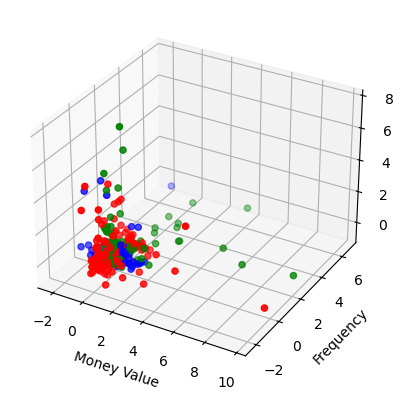

In [97]:
mmap = {
    -1:'red',
    -2:'blue',
    -3:'green',
    #3:'orange'
}
colors = all_outlier_df['Cluster'].map(mmap)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(all_outlier_df['MonetaryValue'], all_outlier_df['Frequency'], all_outlier_df['Recency'], c=colors, marker='o')
ax.set_xlabel('Money Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()